In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow_datasets as tfds
imdb_subwords, info_subwords = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteET44WI/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteET44WI/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteET44WI/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
import tensorflow as tf
import tensorflow.keras as keras

In [4]:
subword_tokenizer = info_subwords.features['text'].encoder

In [5]:
imdb_train, imdb_test = imdb_subwords['train'], imdb_subwords['test']

# Define dimensionality of the embedding
embedding_dim = 64

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(subword_tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 global_average_pooling1d (  (None, 64)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 6)                 390       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 524237 (2.00 MB)
Trainable params: 524237 (2.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# Batch and pad the datasets to the maximum length of the sequences
train_dataset = imdb_train.padded_batch(64)
test_dataset = imdb_test.padded_batch(64)

In [7]:
num_epochs = 10

# Set the training parameters
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Start training
history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 12s 27ms/step - loss: 0.6727 - accuracy: 0.6235 - val_loss: 0.6255 - val_accuracy: 0.6732
Epoch 2/10
391/391 [==============================] - 9s 24ms/step - loss: 0.5203 - accuracy: 0.7975 - val_loss: 0.4469 - val_accuracy: 0.8351
Epoch 3/10
391/391 [==============================] - 9s 24ms/step - loss: 0.3725 - accuracy: 0.8687 - val_loss: 0.3619 - val_accuracy: 0.8637
Epoch 4/10
391/391 [==============================] - 9s 24ms/step - loss: 0.3009 - accuracy: 0.8931 - val_loss: 0.3286 - val_accuracy: 0.8729
Epoch 5/10
391/391 [==============================] - 9s 23ms/step - loss: 0.2614 - accuracy: 0.9062 - val_loss: 0.3141 - val_accuracy: 0.8767
Epoch 6/10
391/391 [==============================] - 9s 23ms/step - loss: 0.2346 - accuracy: 0.9151 - val_loss: 0.3081 - val_accuracy: 0.8773
Epoch 7/10
391/391 [==============================] - 10s 25ms/step - loss: 0.2143 - accuracy: 0.9227 - val_loss: 0.3070 - val_accuracy: 0.87

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = history.epoch

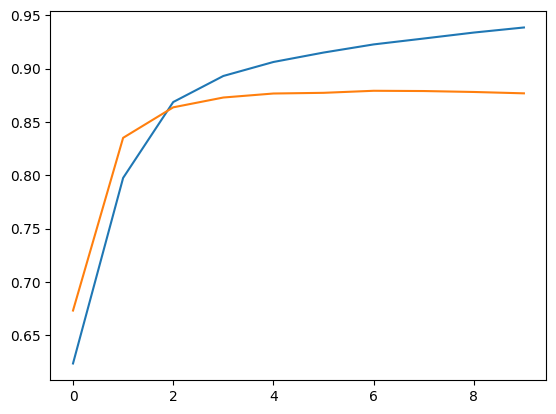

In [9]:
import matplotlib.pyplot as plt
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)

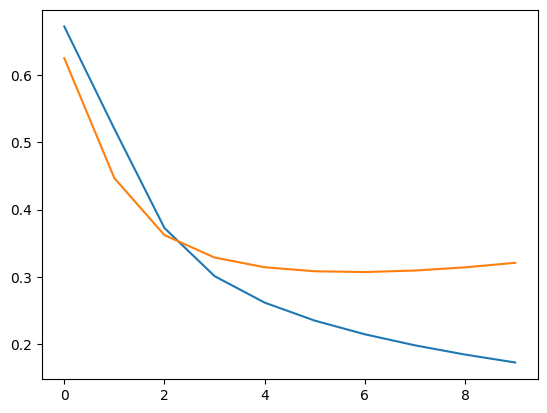

In [10]:
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)